author: Songyang Cheng

date: 0929

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Position 

In [2]:
with open('apikey.txt') as f:
    api_key = f.readline()
    f.close

In [3]:
import gmaps
gmaps.configure(api_key=api_key)

In [9]:
position = pd.DataFrame({
    "no": [1, 2, 6, 10, 9, 11],
    "location": ["SS-22 State St. North Side", "SS-23 State St. South Side", 
                "200 State St. - Goodman's", "200 State St. - Art Center",
                "344 State St.", "341 State St."],
    "longitude": [43.074837, 43.074676, 43.074889, 43.074709, 43.074905, 43.074716],
    "latitude": [-89.387365, -89.387720, -89.388927, -89.389280, -89.391291, -89.391441],
    "loc":[(43.074837,-89.387365), (43.074676,-89.387720), (43.074889,-89.388927),
          (43.074709,-89.389280), (43.074905,-89.391291), (43.074716,-89.391441)]
})
position

,no,location,longitude,latitude,loc
0,1,SS-22 State St. North Side,43.074837,-89.387365,"(43.074837, -89.387365)"
1,2,SS-23 State St. South Side,43.074676,-89.387720,"(43.074676, -89.38772)"
2,6,200 State St. - Goodman's,43.074889,-89.388927,"(43.074889, -89.388927)"
3,10,200 State St. - Art Center,43.074709,-89.389280,"(43.074709, -89.38928)"
4,9,344 State St.,43.074905,-89.391291,"(43.074905, -89.391291)"
5,11,341 State St.,43.074716,-89.391441,"(43.074716, -89.391441)"


In [12]:
intersection = pd.DataFrame({
    "location": ["State and Dayton", "State and Gorham", "State and Johnson"],
    "loc":[(43.074739,-89.388009), (43.074783,-89.391701), (43.074774,-89.389964)]
})
intersection

,location,loc
0,State and Dayton,"(43.074739, -89.388009)"
1,State and Gorham,"(43.074783, -89.391701)"
2,State and Johnson,"(43.074774, -89.389964)"


In [6]:
# st_coordinates = (43.0750, -89.3900)
# gmaps.figure(center=st_coordinates, zoom_level=10)

Figure(layout=FigureLayout(height='420px'))

In [26]:
ped_count_symbol = [
{'no': '1', 'location': (43.074837,-89.387365), 'location': "SS-22 State St. North Side"},
{'no': '2', 'location': (43.074676,-89.387720), 'location': "SS-23 State St. South Side"},
{'no': '6', 'location': (43.074889,-89.388927), 'location': "200 State St. - Goodman's"},
{'no': '10', 'location': (43.074709,-89.389280), 'location': "200 State St. - Art Center"},
{'no': '9', 'location': (43.074905,-89.391291), 'location': "344 State St."},
{'no': '11', 'location': (43.074716,-89.391441), 'location': "341 State St."}
]

In [27]:
#Set up your map
fig = gmaps.figure()

info_box_template = \
"""
<dl>
<dt>NO.</dt><dd>{no}</dd>
<dt>Location</dt><dd>{location}</dd>
</dl>
"""
counter_info = [info_box_template.format(**p) for p in ped_count_symbol]
ped_counter = gmaps.marker_layer(position["loc"], info_box_content=counter_info)

intersect_layer = gmaps.symbol_layer(
intersection["loc"], fill_color='rgba(53, 227, 181, 1)',
stroke_color='rgba(53, 227, 181, 1)', scale=6
)

fig.add_layer(ped_counter)
fig.add_layer(intersect_layer)
fig

Figure(layout=FigureLayout(height='420px'))

It implies how I should link the data of pedestrian and traffic light. For example, I will combine SS-22/SS-23 State St pedestrian data with Dayton/State traffic light data.  

## Relationship Across Time betwee Traffic Light Cycle and Pedestrain Volume 

In [29]:
programs = pd.read_excel('te_cycle_data.xlsx', sheet_name='Programs')
programs.head()

,Intersection,Day Type,Start Time,Pattern
0,State and Dayton,Monday - Thursday,00:30:00,Flash
1,State and Dayton,Monday - Thursday,06:00:00,6
2,State and Dayton,Monday - Thursday,07:00:00,3
3,State and Dayton,Monday - Thursday,09:10:00,1
4,State and Dayton,Monday - Thursday,15:30:00,5


In [30]:
patterns = pd.read_excel('te_cycle_data.xlsx', sheet_name='Patterns')
patterns.head()

,Intersection,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
0,State and Dayton,1,Dayton/Fairchild,State,30,65,35,1.5,3.0,30.5,4.5,7,23.5,30,1.5,3.0,25.5,4.5,12,13.5
1,State and Dayton,3,Dayton/Fairchild,State,6,80,50,1.5,3.0,45.5,4.5,7,38.5,30,1.5,3.0,25.5,4.5,12,13.5
2,State and Dayton,5,Dayton/Fairchild,State,21,80,50,1.5,3.0,45.5,4.5,7,38.5,30,1.5,3.0,25.5,4.5,12,13.5
3,State and Dayton,6,Dayton/Fairchild,State,32,65,35,1.5,3.0,30.5,4.5,7,23.5,30,1.5,3.0,25.5,4.5,12,13.5
4,State and Gorham,1,Gorham,State,29,80,53,1.5,3.5,48.0,5.0,9,39.0,27,2.5,3.0,21.5,5.5,11,10.5


In [31]:
programs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
Intersection    96 non-null object
Day Type        96 non-null object
Start Time      96 non-null object
Pattern         96 non-null object
dtypes: object(4)
memory usage: 3.1+ KB


In [32]:
patterns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 20 columns):
Intersection                             17 non-null object
Pattern                                  17 non-null int64
Main Street                              17 non-null object
Cross Street                             17 non-null object
Cycle Offset (s)                         17 non-null int64
Total Cycle Time (s)                     17 non-null int64
Main Street Total Cycle Time (s)         17 non-null int64
Main Street Red (s)                      17 non-null float64
Main Street Yellow (s)                   17 non-null float64
Main Street Green (s)                    17 non-null float64
Main Street Do Not Walk (s)              17 non-null float64
Main Street Flashing Do Not Walk (s)     17 non-null int64
Main Street Walk (s)                     17 non-null float64
Cross Street Total Cycle Time (s)        17 non-null int64
Cross Street Red (s)                     17 non-null float

Want to combine this two dataframe based on the same columns (Pattern,Intersection). However, it turns out that the type does not match. 
Solution here is to replace 'Flash' in the programs dataframe with 0 and convert the type to int. 

In [33]:
programs['Pattern'] = programs['Pattern'].replace('Flash', 0)
programs['Pattern'].astype('int64')
programs['Pattern'].head()

0    0
1    6
2    3
3    1
4    5
Name: Pattern, dtype: int64

In [34]:
combined = pd.merge(programs, patterns, on=['Intersection', 'Pattern'], how="left")
combined

,Intersection,Day Type,Start Time,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),...,Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
0,State and Dayton,Monday - Thursday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State and Dayton,Monday - Thursday,06:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
2,State and Dayton,Monday - Thursday,07:00:00,3,Dayton/Fairchild,State,6.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
3,State and Dayton,Monday - Thursday,09:10:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
4,State and Dayton,Monday - Thursday,15:30:00,5,Dayton/Fairchild,State,21.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
5,State and Dayton,Monday - Thursday,18:00:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
6,State and Dayton,Monday - Thursday,19:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
7,State and Dayton,Friday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,State and Dayton,Friday,06:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
9,State and Dayton,Friday,07:00:00,3,Dayton/Fairchild,State,6.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5


In [35]:
Dayton = combined[combined['Intersection'] == 'State and Dayton']
Gorham = combined[combined['Intersection'] == 'State and Gorham']
Johnson = combined[combined['Intersection'] == 'State and Johnson']

In [36]:
Dayton

,Intersection,Day Type,Start Time,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),...,Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
0,State and Dayton,Monday - Thursday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State and Dayton,Monday - Thursday,06:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
2,State and Dayton,Monday - Thursday,07:00:00,3,Dayton/Fairchild,State,6.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
3,State and Dayton,Monday - Thursday,09:10:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
4,State and Dayton,Monday - Thursday,15:30:00,5,Dayton/Fairchild,State,21.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
5,State and Dayton,Monday - Thursday,18:00:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
6,State and Dayton,Monday - Thursday,19:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
7,State and Dayton,Friday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,State and Dayton,Friday,06:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
9,State and Dayton,Friday,07:00:00,3,Dayton/Fairchild,State,6.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5


In [37]:
Dayton['Start Time'].count(), Dayton['Main Street'].count()

(24, 21)

In [38]:
Dayton_weekday = Dayton[Dayton['Day Type'] == 'Monday - Thursday']
Dayton_fri = Dayton[Dayton['Day Type'] == 'Friday']
Dayton_sat = Dayton[Dayton['Day Type'] == 'Saturday']
Dayton_sun = Dayton[Dayton['Day Type'] == 'Sunday']
Dayton_weekday.head()

,Intersection,Day Type,Start Time,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),...,Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
0,State and Dayton,Monday - Thursday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State and Dayton,Monday - Thursday,06:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
2,State and Dayton,Monday - Thursday,07:00:00,3,Dayton/Fairchild,State,6.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
3,State and Dayton,Monday - Thursday,09:10:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
4,State and Dayton,Monday - Thursday,15:30:00,5,Dayton/Fairchild,State,21.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5


In [39]:
Dayton_weekday.dtypes

Intersection                              object
Day Type                                  object
Start Time                                object
Pattern                                    int64
Main Street                               object
Cross Street                              object
Cycle Offset (s)                         float64
Total Cycle Time (s)                     float64
Main Street Total Cycle Time (s)         float64
Main Street Red (s)                      float64
Main Street Yellow (s)                   float64
Main Street Green (s)                    float64
Main Street Do Not Walk (s)              float64
Main Street Flashing Do Not Walk (s)     float64
Main Street Walk (s)                     float64
Cross Street Total Cycle Time (s)        float64
Cross Street Red (s)                     float64
Cross Street Yellow (s)                  float64
Cross Street Green (s)                   float64
Cross Street Do Not Walk (s)             float64
Cross Street Flashin

In [41]:
import datetime as dt
import matplotlib.dates as mdates

In [42]:
Dayton_weekday["Start Time"]

0    00:30:00
1    06:00:00
2    07:00:00
3    09:10:00
4    15:30:00
5    18:00:00
6    19:00:00
Name: Start Time, dtype: object

In [43]:
# credit to daronjp@stackoverflow 
# https://stackoverflow.com/questions/58070901/bar-plot-with-24-hours-in-the-x-axis-with-date-time-data-of-only-the-beginning-o

In [44]:
# If the number of seconds elapsed is divisible by 1800 (30 minutes), that number will be used as one of the ticks.
xticks = [x for x in range(60 * 60 * 24 + 30) if x % 1800 == 0]
xticklabels = [str(dt.timedelta(seconds=x)) for x in xticks]

In [45]:
modify_Dayton_starttime = Dayton_weekday['Start Time'].copy() # deep copy 
modify_Dayton_starttime[7] =  dt.time(23,59,59)
modify_Dayton_starttime

0    00:30:00
1    06:00:00
2    07:00:00
3    09:10:00
4    15:30:00
5    18:00:00
6    19:00:00
7    23:59:59
Name: Start Time, dtype: object

In [46]:
# Rather than plotting the dt.time() on the x-axis, it could be easier to plot the number of seconds that have elapsed in the day. 
# Below we use a list comprehension to convert the times into the number of seconds elapsed.
seconds = [(x.hour * 3600 + x.minute * 60 + x.second) for x in modify_Dayton_starttime]

In [47]:
modify_Dayton_green_main = pd.concat([pd.Series([30.5]), Dayton_weekday['Main Street Green (s)']])
modify_Dayton_green_main

0    30.5
0     NaN
1    30.5
2    45.5
3    30.5
4    45.5
5    30.5
6    30.5
dtype: float64

In [48]:
modify_Dayton_green_cross = pd.concat([pd.Series([25.5]), Dayton_weekday['Cross Street Green (s)']])
modify_Dayton_green_cross

0    25.5
0     NaN
1    25.5
2    25.5
3    25.5
4    25.5
5    25.5
6    25.5
dtype: float64

In [49]:
pedestrian = pd.read_csv("Upper_State_St._Pedestrian_Counts.csv")
names = pedestrian.Time.str.split(' ',expand=True)
names.columns = ['date', 'time']
pedestrian = pedestrian.join(names)
pedestrian.drop(['Time'],axis=1, inplace=True)

,SS_22_State_St__North_Side,SS_23_State_St__South_Side,F200_State_St____Goodman_s,F200_State_St____Art_Center,F341_State_St_,F344_State_St_,ObjectId,date,time
0,80,113,82,115,115.0,76.0,1,20-08-2018,08:00:00
1,446,350,445,0,517.0,502.0,2,24-08-2018,12:00:00
2,129,108,117,111,105.0,122.0,3,20-08-2018,09:00:00
3,391,248,370,0,450.0,481.0,4,24-08-2018,13:00:00
4,335,212,281,0,337.0,416.0,5,24-08-2018,14:00:00


In [66]:
pedestrian["date"] = pd.to_datetime(pedestrian["date"])
pedestrian["day_of_week"] = pedestrian["date"].dt.weekday_name
pedestrian["day_of_week"].value_counts()

Friday       1272
Monday       1272
Wednesday    1248
Sunday       1248
Tuesday      1248
Thursday     1247
Saturday     1224
Name: day_of_week, dtype: int64

In [67]:
pedestrian.head()

,SS_22_State_St__North_Side,SS_23_State_St__South_Side,F200_State_St____Goodman_s,F200_State_St____Art_Center,F341_State_St_,F344_State_St_,ObjectId,date,time,day_of_week
0,80,113,82,115,115.0,76.0,1,2018-08-20,08:00:00,Monday
1,446,350,445,0,517.0,502.0,2,2018-08-24,12:00:00,Friday
2,129,108,117,111,105.0,122.0,3,2018-08-20,09:00:00,Monday
3,391,248,370,0,450.0,481.0,4,2018-08-24,13:00:00,Friday
4,335,212,281,0,337.0,416.0,5,2018-08-24,14:00:00,Friday


In [73]:
ped_wkd = pedestrian[(pedestrian['day_of_week'] == 'Monday')|
                     (pedestrian['day_of_week'] == 'Tuesday')|
                     (pedestrian['day_of_week'] == 'Wednesday')|
                     (pedestrian['day_of_week'] == 'Thursday') ]
st_22_wkd = ped_wkd.groupby(ped_wkd.time)["SS_22_State_St__North_Side"].mean()
st_22_wkd.head()

time
00:00:00    68.081340
01:00:00    53.626794
02:00:00    36.264423
03:00:00     7.354067
04:00:00     3.468900
Name: SS_22_State_St__North_Side, dtype: float64

In [74]:
st_23_wkd = ped_wkd.groupby(ped_wkd.time)["SS_23_State_St__South_Side"].mean()
st_23_wkd.head()

time
00:00:00    45.272727
01:00:00    27.593301
02:00:00    14.730769
03:00:00     4.157895
04:00:00     3.751196
Name: SS_23_State_St__South_Side, dtype: float64

In [75]:
dayton_wkd_total = st_22_wkd + st_23_wkd
dayton_wkd_total

time
00:00:00    113.354067
01:00:00     81.220096
02:00:00     50.995192
03:00:00     11.511962
04:00:00      7.220096
05:00:00     13.732057
06:00:00     48.162679
07:00:00    117.660287
08:00:00    160.468900
09:00:00    185.516746
10:00:00    260.090909
11:00:00    434.665072
12:00:00    634.894737
13:00:00    521.746411
14:00:00    449.009569
15:00:00    417.229665
16:00:00    456.502392
17:00:00    516.866029
18:00:00    538.229665
19:00:00    518.157895
20:00:00    422.306220
21:00:00    343.913876
22:00:00    256.846890
23:00:00    172.909091
dtype: float64

In [129]:
# credit to ImportanceOfBeingErnest@overstackflow
# https://stackoverflow.com/questions/43374920/how-to-automatically-annotate-maximum-value-in-pyplot

In [127]:
def annot_max(x,y, ax=None):
    maxIxVal = np.argmax(y);
    zeroBasedIx = np.argwhere(y.index==maxIxVal).flatten()[0];
    xmax = x[zeroBasedIx];
    ymax = y.max()
    text = "x={:s}, count={:.2f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="-",connectionstyle="arc3,rad=0.1")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.98,0.99), **kw)

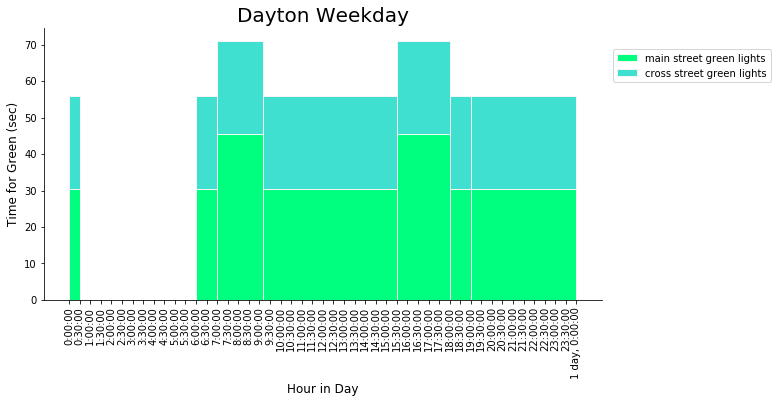

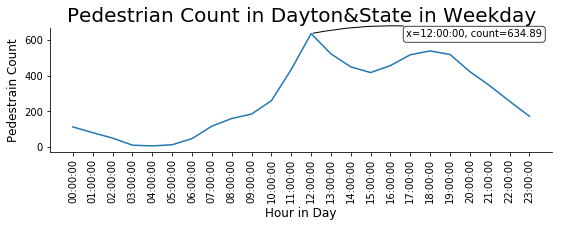

In [128]:
# plt.rcParams['figure.figsize'] = (30.0, 20.0)
# plt.subplots_adjust(wspace=0.3, hspace=0.5)  # adjust plots intervals

# fig, ax = plt.subplots(figsize=(10,5))

# bar_start = 0
# for ix, (second, main_green, cross_green) in enumerate(zip(seconds, modify_Dayton_green_main, modify_Dayton_green_cross)):
#     width = second - bar_start
#     ax.bar(bar_start, main_green, width=width, align='edge', color='springgreen', edgecolor='whitesmoke', 
#            label="main street green lights" if ix == 0 else "_nolegend_")
#     ax.bar(bar_start, cross_green, width=width, bottom=main_green, 
#            align='edge', color = 'turquoise', edgecolor='whitesmoke', label="cross street green lights" if ix == 0 else "_nolegend_")
#     bar_start += width

# ax.set_xticks(xticks)
# ax.set_xticklabels(xticklabels, rotation=90)
# ax.set_title("Dayton Weekday", fontsize=20)
# ax.set_xlabel("Hour in Day", fontsize=12)
# ax.set_ylabel("Time for Green (sec)", fontsize=12)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.legend(loc=[1.02, 0.8])
# plt.show()

# fig2 = plt.figure(figsize=(9, 5))
# ax2 = fig2.add_subplot(211)
# lines = ax2.plot(dayton_wkd_total.index, dayton_wkd_total.values)
# ax2.set_title("Pedestrian Count in Dayton&State in Weekday", fontsize=20)
# ax2.set_xticklabels(dayton_wkd_total.index, rotation=90)
# # ax2.set_yticklabels(dayton_wkd_total.values)
# ax2.set_xlabel("Hour in Day", fontsize=12)
# ax2.set_ylabel("Pedestrain Count", fontsize=12)
# ax2.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)
# annot_max(dayton_wkd_total.index,dayton_wkd_total,ax2);
# None

In [130]:
def lights_ped(timeline, main_gree, cross_green, title1, ped_count, title2):
    fig, ax = plt.subplots(figsize=(10,5))

    bar_start = 0
    for ix, (second, main_green, cross_green) in enumerate(zip(timeline, main_gree, cross_green)):
        width = second - bar_start
        ax.bar(bar_start, main_green, width=width, align='edge', color='springgreen', edgecolor='whitesmoke', 
               label="main street green lights" if ix == 0 else "_nolegend_")
        ax.bar(bar_start, cross_green, width=width, bottom=main_green, 
               align='edge', color = 'turquoise', edgecolor='whitesmoke', label="cross street green lights" if ix == 0 else "_nolegend_")
        bar_start += width

    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, rotation=90)
    ax.set_title(title1, fontsize=20)
    ax.set_xlabel("Hour in Day", fontsize=12)
    ax.set_ylabel("Time for Green (sec)", fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend(loc=[1.02, 0.8])
    plt.show()

    fig2 = plt.figure(figsize=(9, 5))
    ax2 = fig2.add_subplot(211)
    lines = ax2.plot(ped_count.index, ped_count.values)
    ax2.set_title(title2, fontsize=20)
    ax2.set_xticklabels(ped_count.index, rotation=90)
    ax2.set_xlabel("Hour in Day", fontsize=12)
    ax2.set_ylabel("Pedestrain Count", fontsize=12)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    annot_max(ped_count.index, ped_count,ax2);
    None

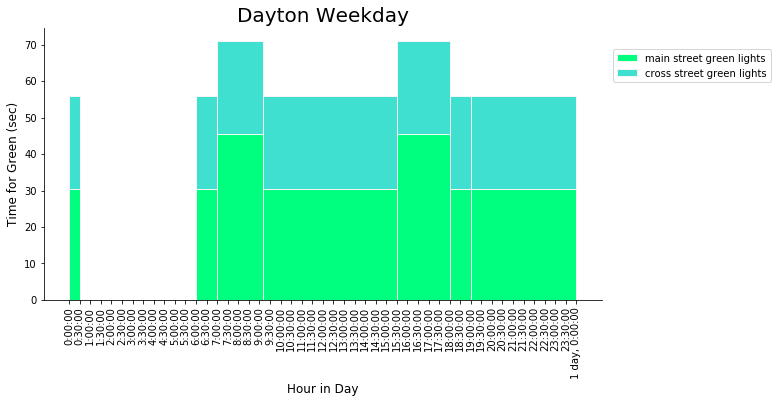

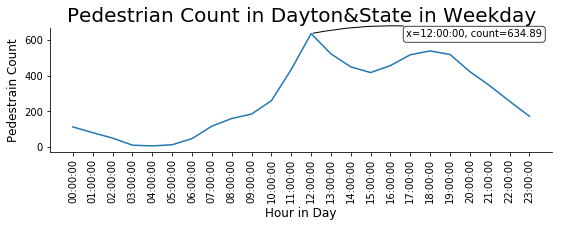

In [131]:
lights_ped(seconds, modify_Dayton_green_main, modify_Dayton_green_cross, "Dayton Weekday",
           dayton_wkd_total, "Pedestrian Count in Dayton&State in Weekday")

In [166]:
import warnings
warnings.filterwarnings("ignore")

In [174]:
def preprocess_ped_lights(ped_, street1, street2, lights_):
    # calculate all pedestrian in the specific street area group by time
    s1 = ped_.groupby(ped_.time)[street1].mean()
    s2 = ped_.groupby(ped_.time)[street2].mean()
    ped_total = s1 + s2
    
    # preprocess time 
    modify = lights_['Start Time'].copy()
    modify.reset_index(inplace=True, drop=True)
    modify[len(modify)] =  dt.time(23,59,59)
    
    
    seconds = [(x.hour * 3600 + x.minute * 60 + x.second) for x in modify]
    main = pd.concat([pd.Series([lights_['Main Street Green (s)'].iloc[-1]]), lights_['Main Street Green (s)']])
    cross = pd.concat([pd.Series([lights_['Cross Street Green (s)'].iloc[-1]]), lights_['Cross Street Green (s)']])
    
    return ped_total, seconds, main, cross

In [175]:
ped_fri = pedestrian[pedestrian['day_of_week'] == 'Friday']

dayton_fri_total, dayton_fri_seconds, modify_Dayton_green_main_fri, modify_Dayton_green_cross_fri = \
    preprocess_ped_lights(ped_fri, "SS_22_State_St__North_Side", "SS_23_State_St__South_Side", Dayton_fri)

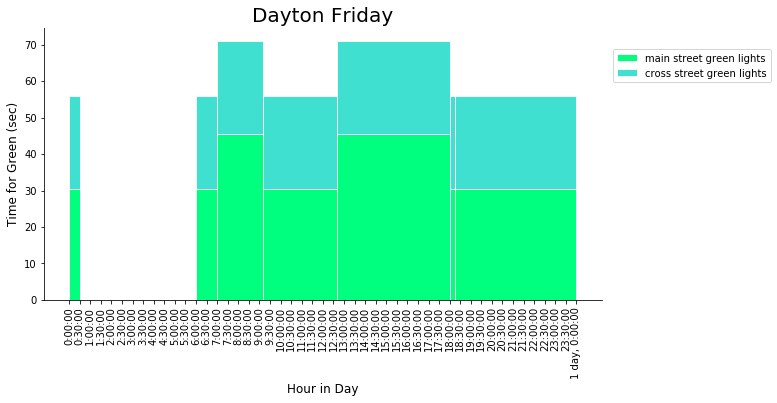

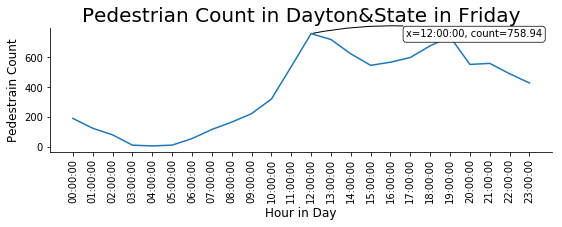

In [176]:
lights_ped(dayton_fri_seconds, modify_Dayton_green_main_fri, modify_Dayton_green_cross_fri, "Dayton Friday",
           dayton_fri_total, "Pedestrian Count in Dayton&State in Friday")

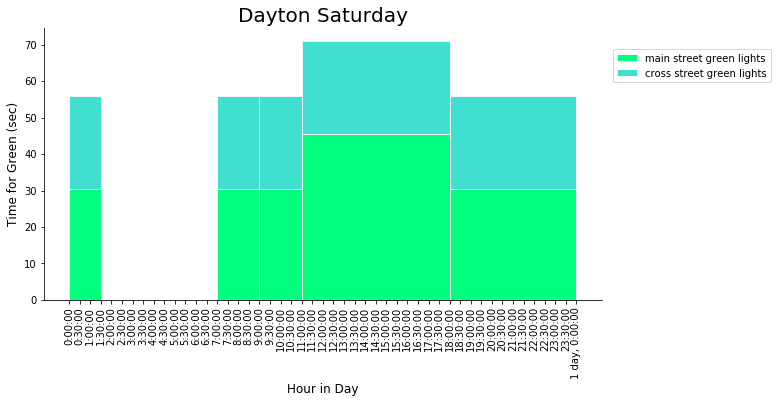

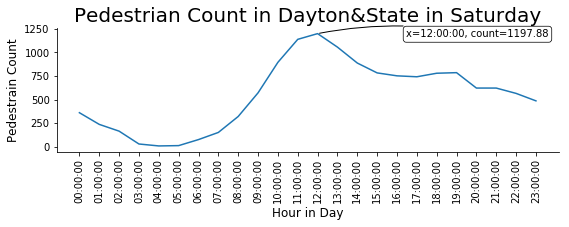

In [179]:
ped_sat = pedestrian[pedestrian['day_of_week'] == 'Saturday']

dayton_sat_total, dayton_sat_seconds, modify_Dayton_green_main_sat, modify_Dayton_green_cross_sat = \
    preprocess_ped_lights(ped_sat, "SS_22_State_St__North_Side", "SS_23_State_St__South_Side", Dayton_sat)

lights_ped(dayton_sat_seconds, modify_Dayton_green_main_sat, modify_Dayton_green_cross_sat, "Dayton Saturday",
           dayton_sat_total, "Pedestrian Count in Dayton&State in Saturday")

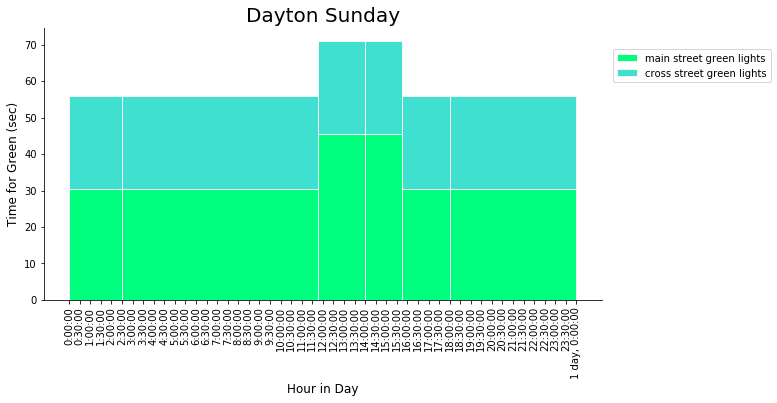

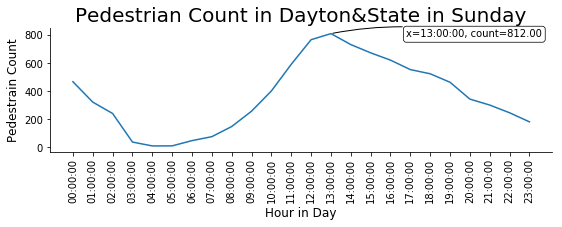

In [180]:
ped_sun = pedestrian[pedestrian['day_of_week'] == 'Sunday']

dayton_sun_total, dayton_sun_seconds, modify_Dayton_green_main_sun, modify_Dayton_green_cross_sun = \
    preprocess_ped_lights(ped_sun, "SS_22_State_St__North_Side", "SS_23_State_St__South_Side", Dayton_sun)

lights_ped(dayton_sun_seconds, modify_Dayton_green_main_sun, modify_Dayton_green_cross_sun, "Dayton Sunday",
           dayton_sun_total, "Pedestrian Count in Dayton&State in Sunday")

1. We can consider adopting the same traffic lights pattern on Saturday and Sunday. 

The Pedestrian Count have only one peak around 12 pm - 1 pm on both Saturday and Sunday. However, there are two peaks, one around 12 pm and the other around 6 pm, from Monday to Friday. It can be explained by the commuting. 

2. More people walk at noon and on Saturday. (an intuitive conclusion)

We can easily see the trends from the plots. The number of people who walk on Saturday is almost as twice large as the number who walk on weekday (From Monday to Thursday). The number for Friday and Sunday are only 1/3 larger than the number on weekday. 

3. Trends do not align with the traffic lights. 

Traffic lights may favor cars instead of pedestrian. Need cars data. Need further investigation. 

## Green Lights Cycle

In [181]:
## TODO: next time 

In [29]:
import plotly.figure_factory as ff

In [31]:
Dayton_weekday

,Intersection,Day Type,Start Time,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),...,Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
0,State and Dayton,Monday - Thursday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State and Dayton,Monday - Thursday,06:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
2,State and Dayton,Monday - Thursday,07:00:00,3,Dayton/Fairchild,State,6.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
3,State and Dayton,Monday - Thursday,09:10:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
4,State and Dayton,Monday - Thursday,15:30:00,5,Dayton/Fairchild,State,21.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
5,State and Dayton,Monday - Thursday,18:00:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
6,State and Dayton,Monday - Thursday,19:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5


In [34]:
Dayton_wkd_cycle = Dayton_weekday[['Start Time', 'Pattern', 
                                   'Main Street Red (s)', 'Main Street Yellow (s)', 'Main Street Green (s)', 'Main Street Total Cycle Time (s)',
                                   'Cross Street Red (s)', 'Cross Street Yellow (s)', 'Cross Street Green (s)', 'Cross Street Total Cycle Time (s)']]
Dayton_wkd_cycle

,Start Time,Pattern,Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s)
0,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06:00:00,6,1.5,3.0,30.5,35.0,1.5,3.0,25.5,30.0
2,07:00:00,3,1.5,3.0,45.5,50.0,1.5,3.0,25.5,30.0
3,09:10:00,1,1.5,3.0,30.5,35.0,1.5,3.0,25.5,30.0
4,15:30:00,5,1.5,3.0,45.5,50.0,1.5,3.0,25.5,30.0
5,18:00:00,1,1.5,3.0,30.5,35.0,1.5,3.0,25.5,30.0
6,19:00:00,6,1.5,3.0,30.5,35.0,1.5,3.0,25.5,30.0


In [35]:
Dayton_wkd_cycle['Main Street Red (s)'] +=  Dayton_wkd_cycle['Cross Street Total Cycle Time (s)']
Dayton_wkd_cycle['Cross Street Red (s)'] += Dayton_wkd_cycle['Main Street Total Cycle Time (s)']
Dayton_wkd_cycle

,Start Time,Pattern,Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s)
0,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06:00:00,6,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0
2,07:00:00,3,31.5,3.0,45.5,50.0,51.5,3.0,25.5,30.0
3,09:10:00,1,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0
4,15:30:00,5,31.5,3.0,45.5,50.0,51.5,3.0,25.5,30.0
5,18:00:00,1,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0
6,19:00:00,6,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0


In [ ]:
# colors = ["red", "yellow", 'rgb(210, 60, 180)']
# cycle_pat = ff.create_gantt(Dayton_wkd_cycle, colors=colors, index_col='Resource', show_colorbar=True)
# cycle_pat.show()

In [43]:
Dayton_wkd_cycle_p1 = Dayton_wkd_cycle[Dayton_wkd_cycle['Pattern'] == 1]
Dayton_wkd_cycle_p1[:1]

,Start Time,Pattern,Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s)
3,09:10:00,1,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0


In [ ]:
fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
# ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
    xcenters = starts + widths / 2

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

TypeError: barh() got multiple values for argument 'width'

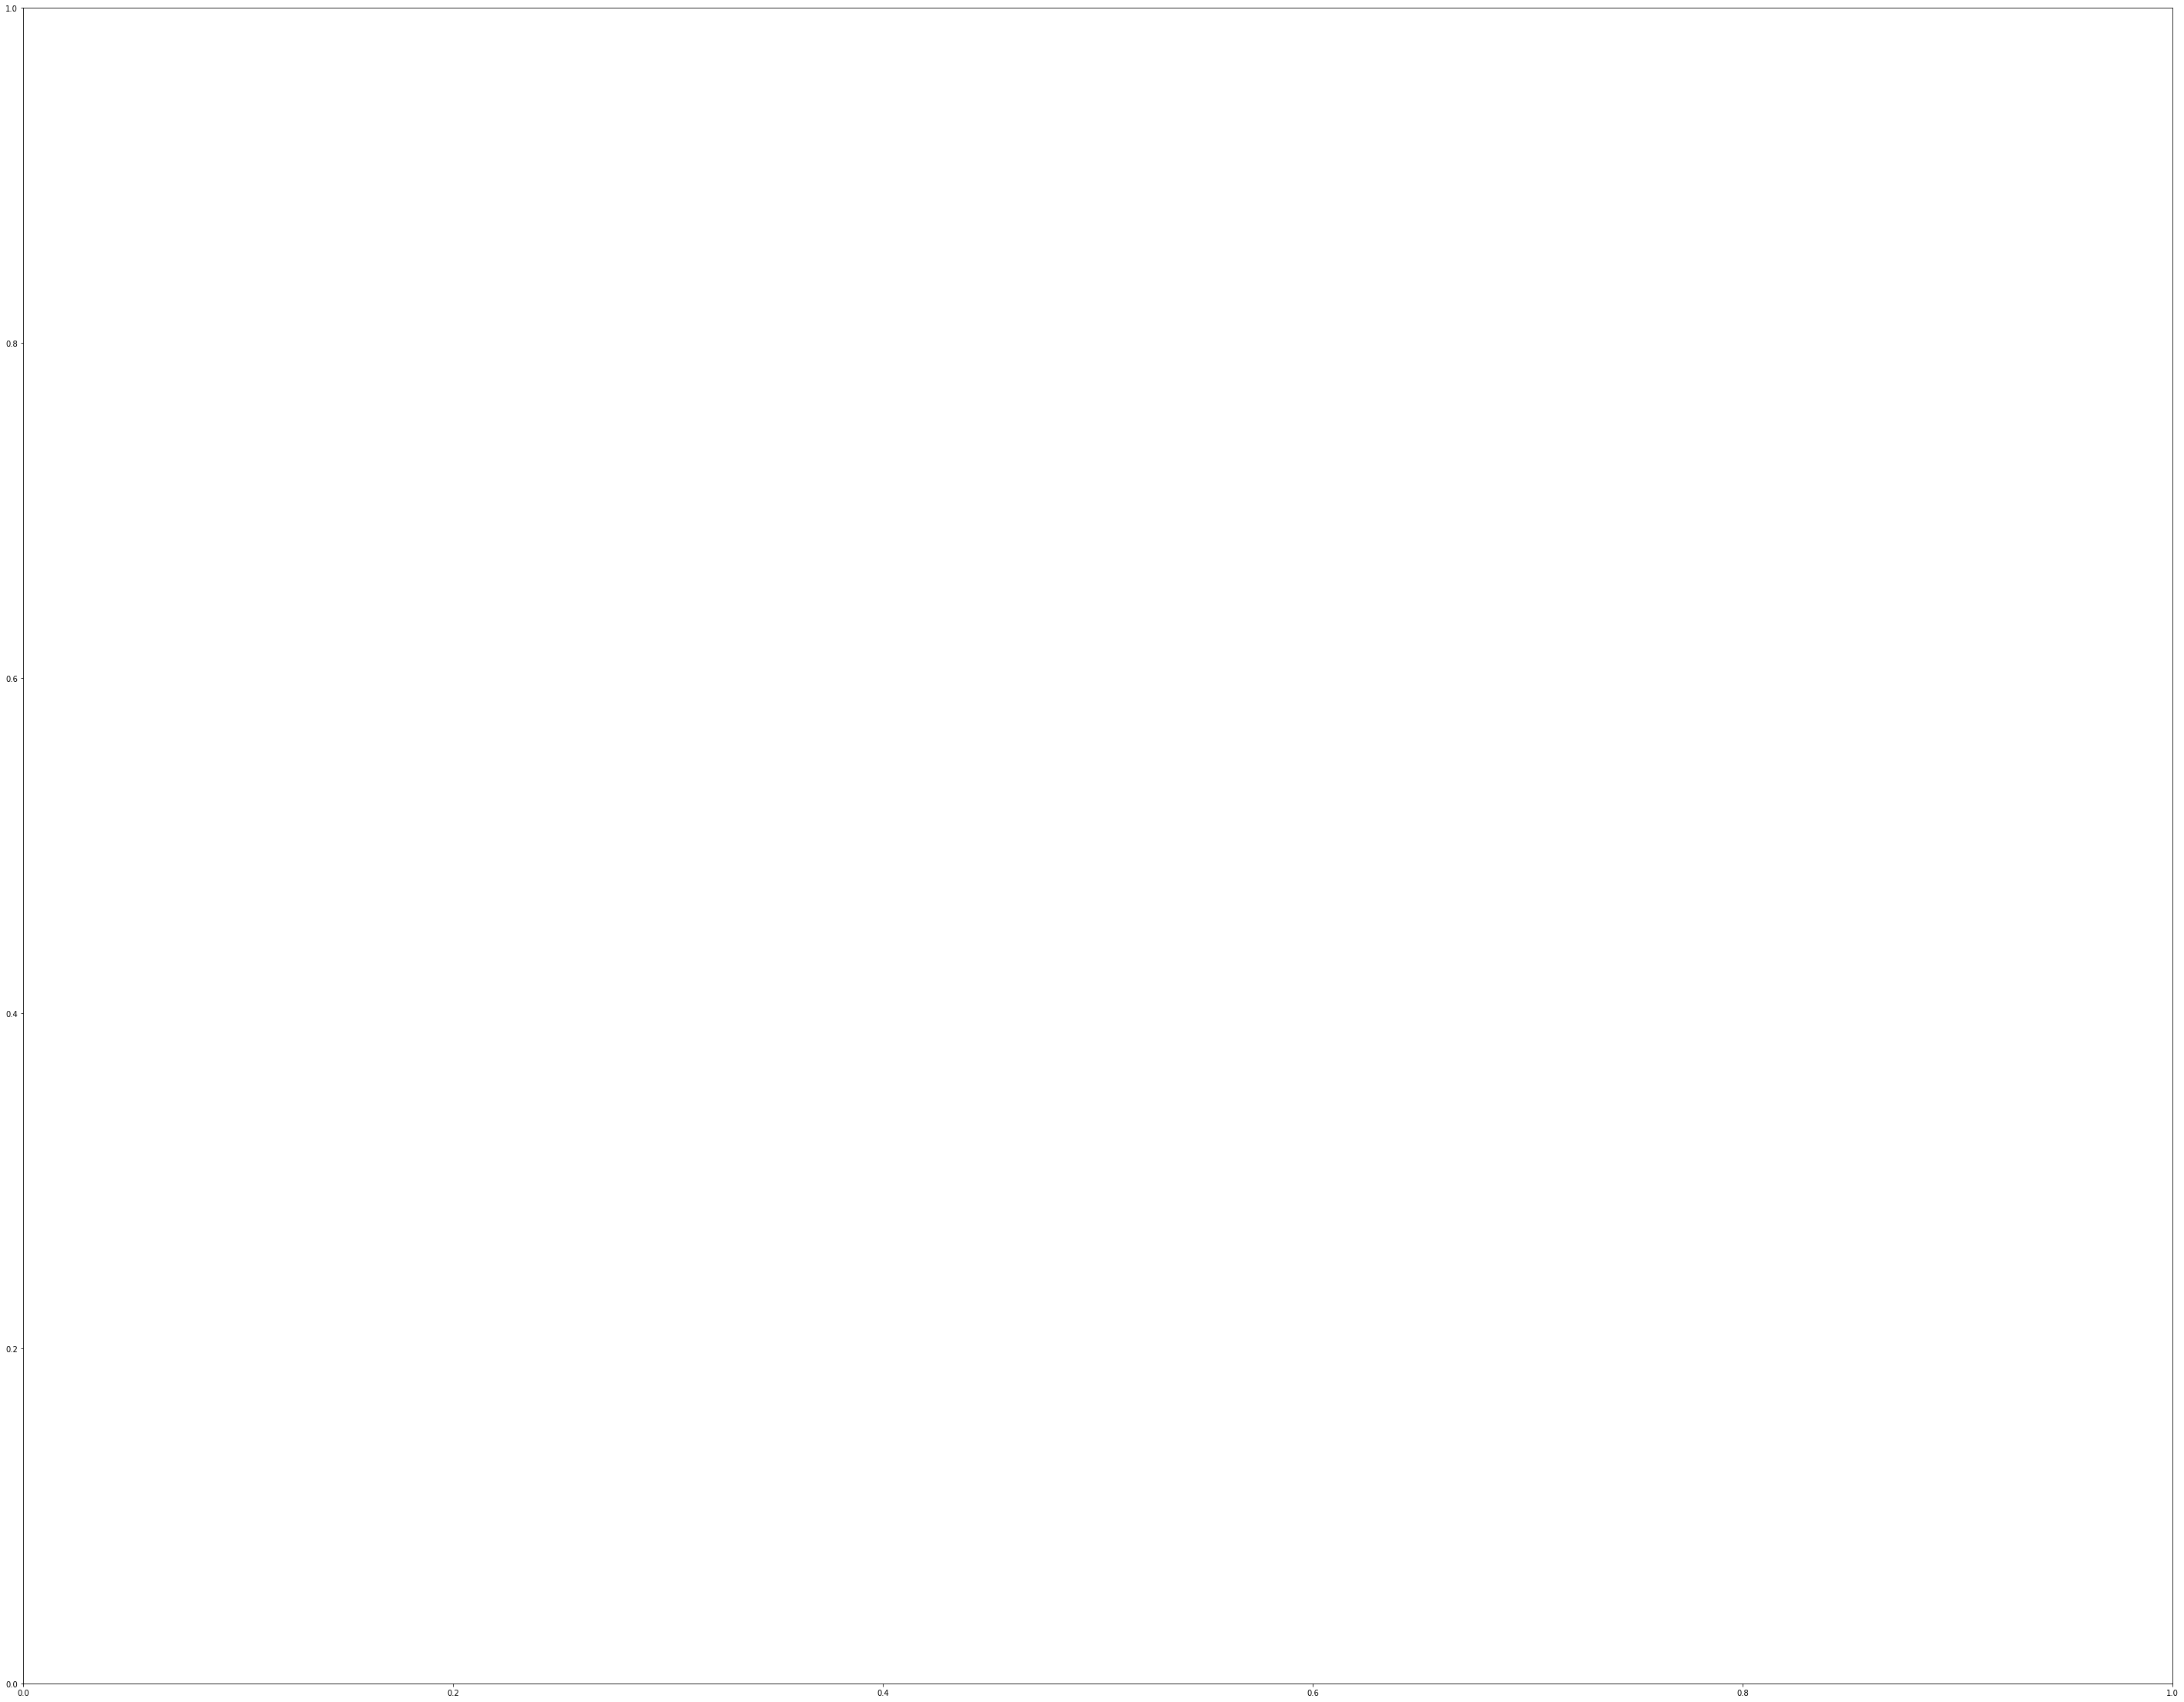

In [37]:
# fig, ax = plt.subplots()

# p = Dayton_wkd_cycle.Pattern
# y_pos = np.arange(len(p))

# ax.barh(Dayton_wkd_cycle['Cross Street Red (s)'], Dayton_wkd_cycle['Pattern'], width=5)
# ax.set_yticks(y_pos)
# ax.set_yticklabels(Dayton_wkd_cycle.Pattern)
# ax.set_xlabel('Green Light Cycle')
# ax.set_title('Cycle time ')

# plt.show()